## How to build a binary classifier using a perceptron learning with step activation function. The following data represent two measurements x1 and x2 and a label (l) associated with the measurement.

### Perceptron initial weights: w = (0.7,0.5,1)
- The following data represent two measurements x1 and x2 and a label (l) associated with the measurement.



num | label | $ x_1 $ | $ x_2 $
--- | --- | --- | ---
1 | 0 | -1 | 2
2 | 1 | 1 | 1
3 | 1 | -2 | -1
4 | 0 | -2 | -1
5 | 0 | 1 | -1

1. Since the perceptron with linear activation function defines a 1D hyperplane that separates the labeled data, given model’s initial parameters w = (0.7, 0.5, 1)
    - a. what is the line’s slope:
    - b. what is the line’s intersect:
    - c. draw the perceptron line in the picture above.
2. Calculate model’s accuracy for all data points 1-5, show your work:

## Line's Slope

- Rewrite [bias, w0, w1]:
$ [w_0, w_1, w_2] = [0.7,0.5,1] $

- Plug the weights into the general form $ (w_0 + w_1x_1 + w_2x_2 = 0) $ and solve for $ x_1, x_1=0, x_1, x_2=0 $:
    - x = $ (-w_0 - w_2x_2) / w1 $  
    - x = $ 0 when x_2 = -w_0/w_2  $
    - $ x_2 $ = $ (-w_0 - w_1x_1)/w_2  $ 
    - $ x_2 $ = 0 when $ x_1 = -w_0/w_1 $

- slope = $ (-w_0/w_2) / (w_0/w_1) $
- intercept = $ -w_0/w_2 $


## Slope = (-w0/w2) / (w0/w1) 
    = (-0.7 / 1) / (0.7 / 0.5) 
    = -0.7 / 1.4 
## = -1/2 
## intercept = -w0 / w2
    = 0.7 / 1
## = -0.7

## Regression line : y = -1/2x - 0.7

# Accuracy
Model accuracy calculated with MSE:
- $ MSE = 1/N * sum((actual - predicted)^2)$
- $ 1/5 * sum $

num | x | actual | predicted | error | $ error^2 $
--- | --- | --- | --- | --- | ---
1 | -1 | 2 | $ -1/2*(-1) + 0.7 = 1.2 $ | 2 - 1.2 = 0.8 | 0.64
2 | 1 | 1 | $ -1/2*(1) + 0.7 = 0.2 $ | 1 - 0.2 = 0.8 |0.64
3 | -2 | -1 | $ -1/2*(-2) + 0.7 = 1.7 $ | -1 - 1.7 = -2.7 | -7.29
4 | -2 | -1 | $ -1/2*(-2) + 0.7 = 1.7 $ | -1 - 1.7 = -2.7 | -7.29
5 | 1 | -1 | $ -1/2*(1) + 0.7 = 0.2 $ | -1 - 0.2 = 1.2 | 1.44

3) Adjust the model using the above data with a batch of 1. 
    - Step through the data in order, check the prediction and whenever you get a wrong prediction, adjust the model and keep going with the rest of the datapoints (stop and fix). Use the learning rate of 0.3.
    - Go through the data only once.
4) What is the model accuracy after step (3)? 
    - Draw the classification hyperplane.

# 3) Perceptron training : $ w_i := (mu * (target - predicted)*x_i)$

2.2
[ 0.3 -0.3  0.6]
Error:1.000000 charge:2.200000 predict:1.000000 L[i]:0.000000 
1.6
-1.6
[-0.3  0.6  0.3]
Error:-1.000000 charge:-1.600000 predict:0.000000 L[i]:1.000000 
0.2
[ 0.3 -0.6 -0.3]
Error:1.000000 charge:0.200000 predict:1.000000 L[i]:0.000000 
0.8
[ 0.3  0.3 -0.3]
Error:1.000000 charge:0.800000 predict:1.000000 L[i]:0.000000 
Accuracy: 0.200000
1.0
[ 0.3 -0.3  0.6]
Error:1.000000 charge:1.000000 predict:1.000000 L[i]:0.000000 
0.7
-1.9
[-0.3  0.6  0.3]
Error:-1.000000 charge:-1.900000 predict:0.000000 L[i]:1.000000 
-0.1
0.5
[ 0.3  0.3 -0.3]
Error:1.000000 charge:0.500000 predict:1.000000 L[i]:0.000000 
Accuracy: 0.400000


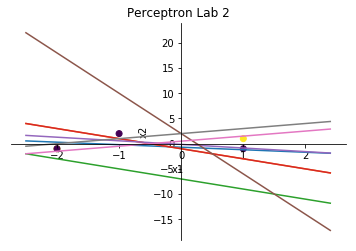

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron Lab 2')

#data is label, x1, x2
data = np.array([[0,-1,2],
                 [1,1,1],
                 [1,-2,-1],
                 [0,-2,-1],
                 [0,1,-1]])

rows = data.shape[0]
cols = data.shape[1]


L  = data[:, 0]
X1 = data[:, 1]
X2 = data[:, 2]
W  = np.array([0.7, 0.5, 1.0])
mu = 0.3

ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))


plt.scatter(X1, X2, c=L)
plt.plot (np.arange (-2.5,2.5,0.1), -W[0]/W[2] - W[1]/W[2] * np.arange(-2.5,2.5,0.1))

for j in range(2): #epochs
    accuracy = 0
    for i in range(rows): #all data in set
        charge = W[0] + np.sum(np.multiply(data[i, 1:], W[1:]))
        print(charge)
        predict = 1 if charge > 0 else 0
        
        if predict == L[i]:
            accuracy +=1
        else:
            Error = predict - L[i]
            W_t = W
            X_t = np.concatenate(([1], data[i,1:])) #delta weights
            W_t = np.multiply(mu, np.multiply(Error, X_t))
            W = np.subtract(W, W_t)
            print(W_t)
            print("Error:%f charge:%f predict:%f L[i]:%f "%(Error, charge, predict, L[i]))
            plt.plot (np.arange (-2.5,2.5,0.1), -W[0]/W[2] - W[1]/W[2] * np.arange(-2.5,2.5,0.1))
    print("Accuracy: %f"%(float(accuracy)/rows))
plt.show()
